In [1]:
#Dependicies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#Study data files
mouseMetadataPath = ('data/Mouse_metadata.csv')
studyResultsPath = ('data/Study_results.csv')

#Read the mouse data and study the results
mouseMetadata=pd.read_csv(mouseMetadataPath)
studyResults=pd.read_csv(studyResultsPath)

#Combine the data into a single data set
mouseStudy = pd.merge(studyResults,mouseMetadata, how='outer', on=["Mouse ID","Mouse ID"])
mouseStudy.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#Checking number of mice
numberOfMice = mouseStudy['Mouse ID'].nunique()
numberOfMice

249

In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicateMouseID=mouseStudy.loc[mouseStudy.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicateMouseID

array(['g989'], dtype=object)

In [4]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
mouseStudyClean = mouseStudy[mouseStudy['Mouse ID'].isin(duplicateMouseID)==False]
mouseStudyClean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
#Checking the number of mice in the clean DataFrame
numberOfMiceClean = mouseStudyClean['Mouse ID'].nunique()
numberOfMiceClean

248

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean =mouseStudyClean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median=mouseStudyClean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance=mouseStudyClean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
standardDeviation=mouseStudyClean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SEM=mouseStudyClean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [7]:
# Assemble the resulting series into a single summary DataFrame.
summaryStatisticsTable = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance,
                                       "Tumor Volume Std. Dev":standardDeviation,"Tumor Volume Std. Err.":SEM})
summaryStatisticsTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line.
summaryStatisticsTableAgg = mouseStudyClean.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])[['Tumor Volume (mm3)']]
summaryStatisticsTableAgg

C:\Users\Jackson\AppData\Local\Temp\ipykernel_276332\2386769220.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summaryStatisticsTableAgg = mouseStudyClean.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])[['Tumor Volume (mm3)']]


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
#Determine the number of mice per drug
micePerRegimen=mouseStudyClean['Drug Regimen'].value_counts()
micePerRegimen

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

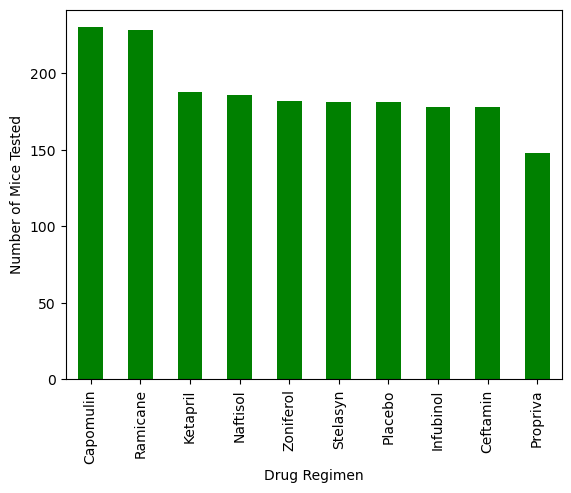

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceRegimenBar=micePerRegimen.plot.bar(color='g')
miceRegimenBar.set_xlabel('Drug Regimen')
miceRegimenBar.set_ylabel('Number of Mice Tested')

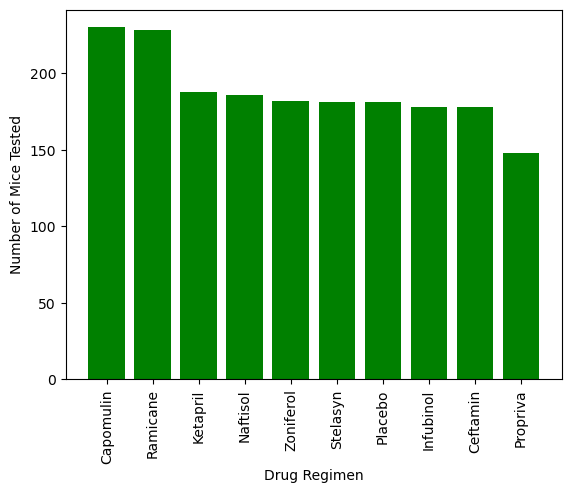

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugRegimen=micePerRegimen.index.values
plt.bar(drugRegimen,micePerRegimen,color='g')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

In [12]:
#Determine the number of mice for each sex
numberOfMiceBySex = mouseStudyClean['Sex'].value_counts()
numberOfMiceBySex

Male      958
Female    922
Name: Sex, dtype: int64

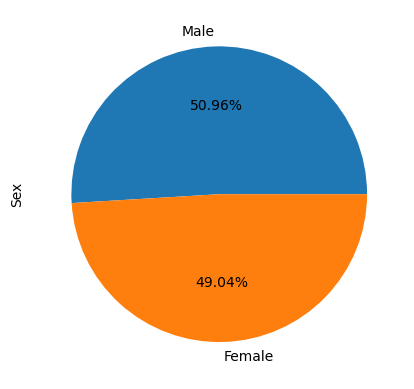

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
numberOfMiceBySexPieChart=numberOfMiceBySex.plot.pie(autopct='%1.2f%%')

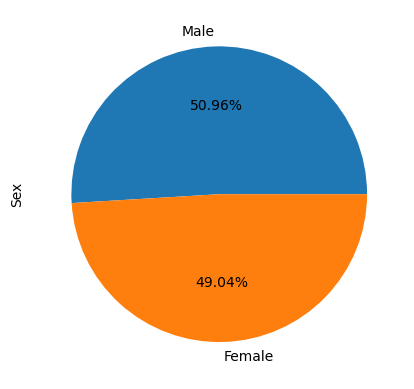

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(numberOfMiceBySex,labels=labels,autopct="%1.2f%%")
plt.ylabel('Sex')
plt.show()


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint=mouseStudyClean.groupby('Mouse ID')['Timepoint'].max()
maxTimepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxMouseStudyClean = pd.merge(mouseStudyClean,maxTimepoint, on=['Mouse ID','Timepoint'])
maxMouseStudyClean.rename(columns={'Timepoint':'Max Timepoint'})

,Mouse ID,Max Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [17]:
#Create a list that holds treatment names and a empty list to hold tumor volume data
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
tumorVolume =[]

In [18]:
#Loop through each drug in the treatment list, locating the rows in maxMouseStudyClean DataFrame that correspond to each treatment. Sotres resulting tumor volumes for each 
#drug to the empty tumorVolume list.
for drug in drugs:
        finalVolume = maxMouseStudyClean.loc[maxMouseStudyClean['Drug Regimen'] == drug]
        values = finalVolume['Tumor Volume (mm3)']
        tumorVolume.append(values)
        quartiles=values.quantile([.25,.75])
        lowerQuartile = quartiles[0.25]
        upperQuartile = quartiles[0.75]
        iqr = (upperQuartile-lowerQuartile)
        print('IQR for ',drug,':',iqr)
        lowerBound = lowerQuartile - (1.5*iqr)
        upperBound = upperQuartile + (1.5*iqr)
        print('Lower Bound for',drug,':',lowerBound)
        print('Upper Bound for',drug,':', upperBound)
        outliers = values.loc[(finalVolume['Tumor Volume (mm3)'] >= upperBound) | (finalVolume['Tumor Volume (mm3)'] <= lowerBound)]
        print(drug+'\'s', ' outliers:', outliers)
        print('--------------------')

IQR for  Capomulin : 7.781863460000004
Lower Bound for Capomulin : 20.70456164999999
Upper Bound for Capomulin : 51.83201549
Capomulin's  outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------
IQR for  Ramicane : 9.098536719999998
Lower Bound for Ramicane : 17.912664470000003
Upper Bound for Ramicane : 54.30681135
Ramicane's  outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------
IQR for  Infubinol : 11.477135160000003
Lower Bound for Infubinol : 36.83290494999999
Upper Bound for Infubinol : 82.74144559000001
Infubinol's  outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------
IQR for  Ceftamin : 15.577752179999997
Lower Bound for Ceftamin : 25.355449580000002
Upper Bound for Ceftamin : 87.66645829999999
Ceftamin's  outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------


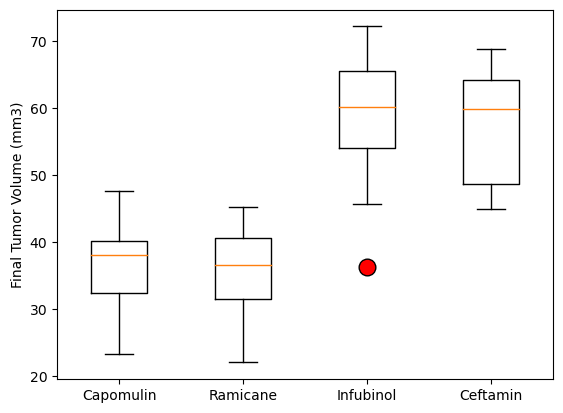

In [19]:
# Plot boxplot and format boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
plt.boxplot(tumorVolume,flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

In [20]:
#Find mouse id = b128
mouseb128 = mouseStudyClean.loc[mouseStudyClean['Mouse ID']=='b128']


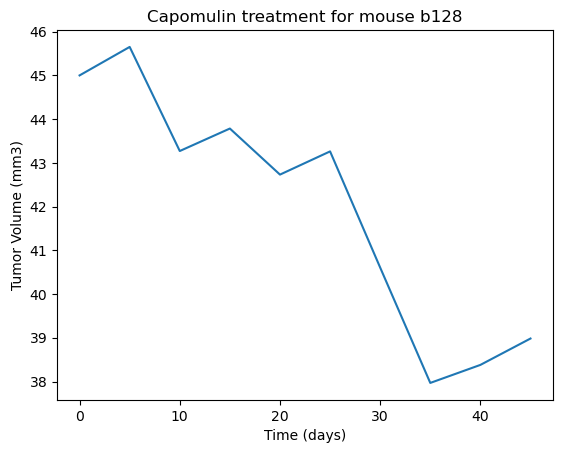

In [21]:
#Plot and format corresponding data for mouse id = b128
plt.plot(mouseb128['Timepoint'],mouseb128['Tumor Volume (mm3)'])
plt.title('Capomulin treatment for mouse b128')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [22]:
# Create a new data frame for only the mice that received Capomulin
capomulin=mouseStudyClean.loc[mouseStudyClean['Drug Regimen']=='Capomulin']
capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [23]:
#Sort the new data frame by mouse ID and determine the mean
meanCapomulin = capomulin.groupby(['Mouse ID']).mean()
meanCapomulin

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


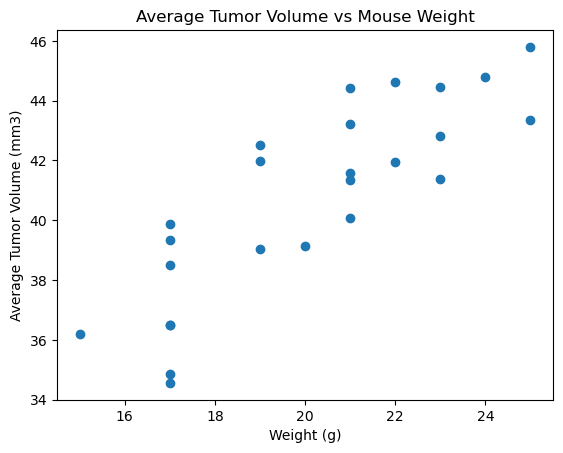

In [24]:
# Plot and format scatter plot for average tumor volume vs mouse weight
plt.scatter(meanCapomulin['Weight (g)'],meanCapomulin['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [25]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(meanCapomulin['Weight (g)'],meanCapomulin['Tumor Volume (mm3)'])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

In [26]:
#Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
m,b=np.polyfit(meanCapomulin['Weight (g)'],meanCapomulin['Tumor Volume (mm3)'],1)
print(m,b)

0.9544396890241048 21.552160532685


NameError: name 'x' is not defined

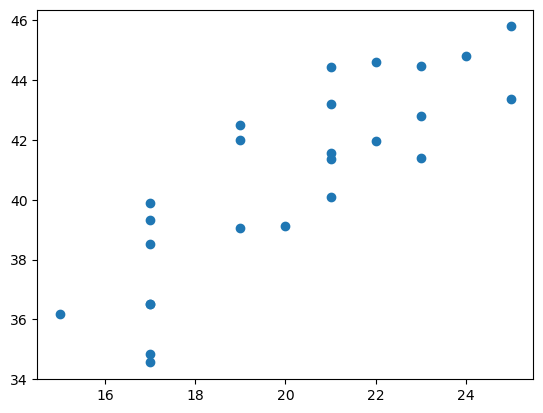

In [27]:
#Plot the scatter data with the linear regression
plt.scatter(meanCapomulin['Weight (g)'],meanCapomulin['Tumor Volume (mm3)'])
plt.plot(x,m*x+b,color='red')
plt.title('Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()